# Importing the Dependencies



In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing



In [88]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('heart.csv')

In [89]:
# print first 5 rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
# print last 5 rows of the dataset
df.tail()
     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [91]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [92]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [93]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [94]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [95]:
# checking the distribution of Target Variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [96]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [97]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Visulaization

In [98]:
from matplotlib import pyplot as plt 
import seaborn as sns

# Numerical Feature

# Distribution

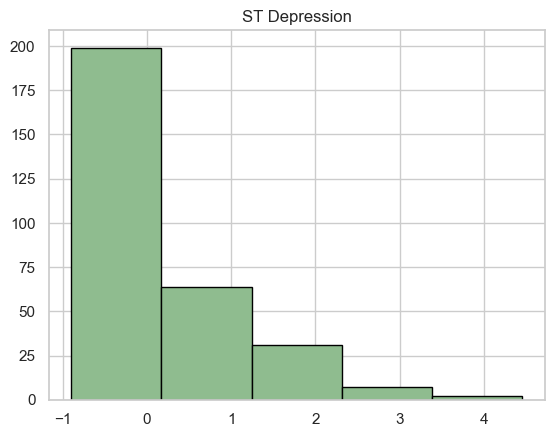

In [99]:
plt.hist(df['oldpeak'], bins = 5, edgecolor = 'black',color='DarkSeaGreen')
plt.title('ST Depression')
plt.show()

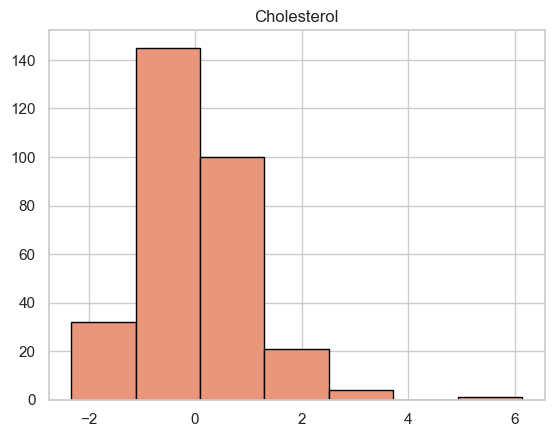

In [100]:
plt.hist(df['chol'], bins = 7, edgecolor = 'black',color='DarkSalmon')
plt.title('Cholesterol')
plt.show()

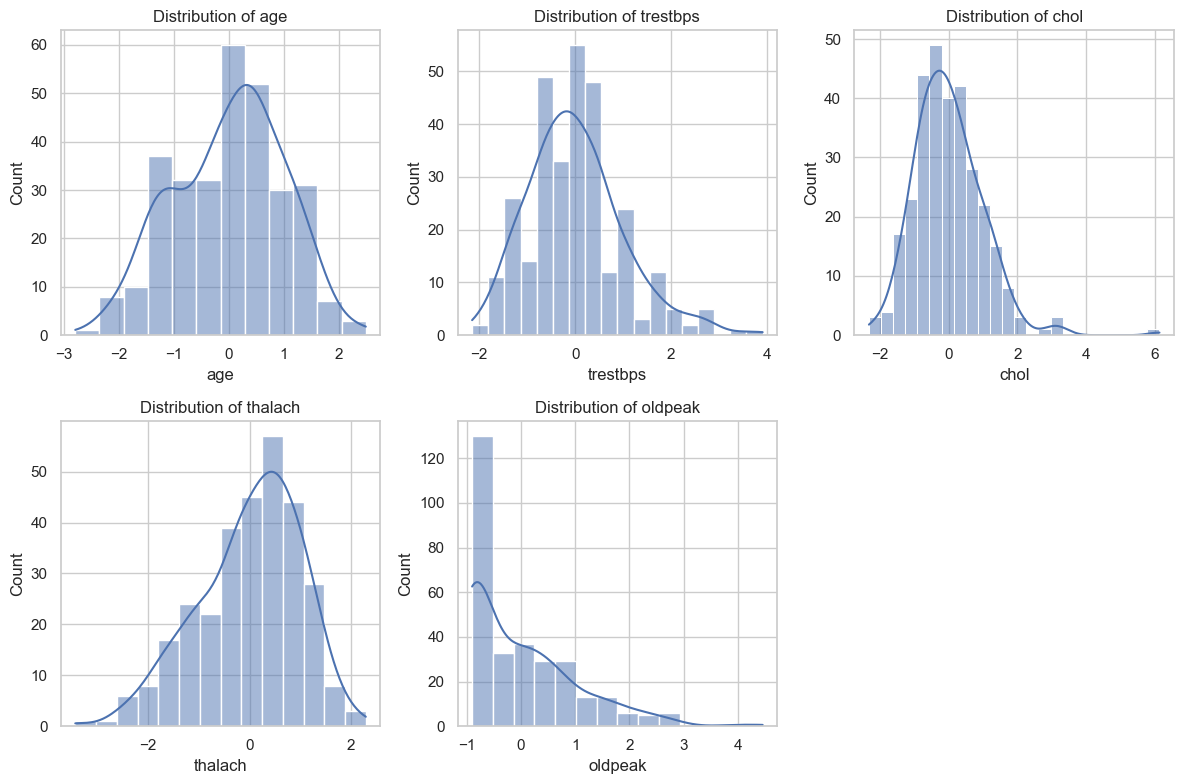

In [101]:
sns.set(style="whitegrid")

# distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Relationship between different numerical features


Text(0.5, 1.0, 'Age vs Max Heart Rate')

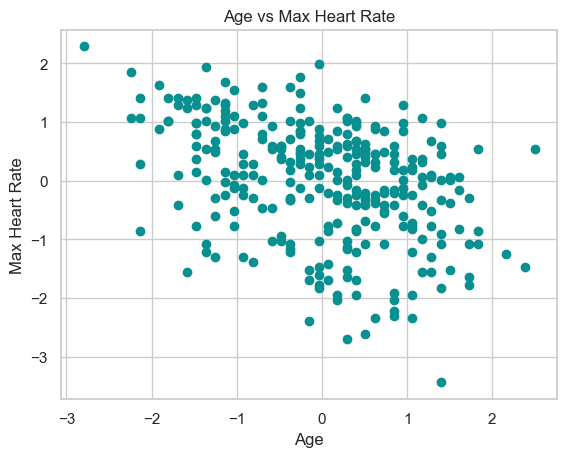

In [102]:
plt.scatter(df['age'],df['thalach'], c = '#088F8F', linewidth = 1)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate')

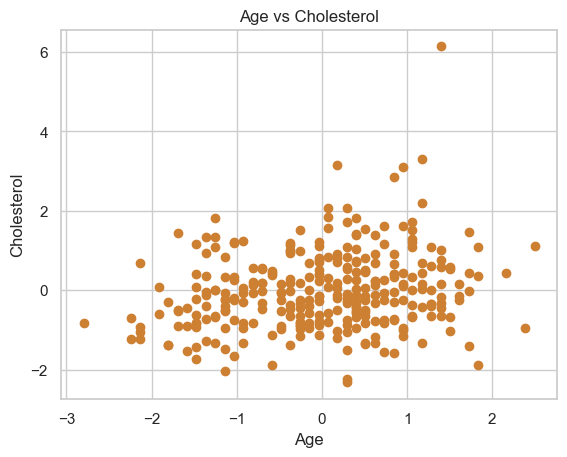

In [103]:
plt.scatter(df['age'],df['chol'],  c = '#CD7F32', linewidth = 1)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')
plt.show()

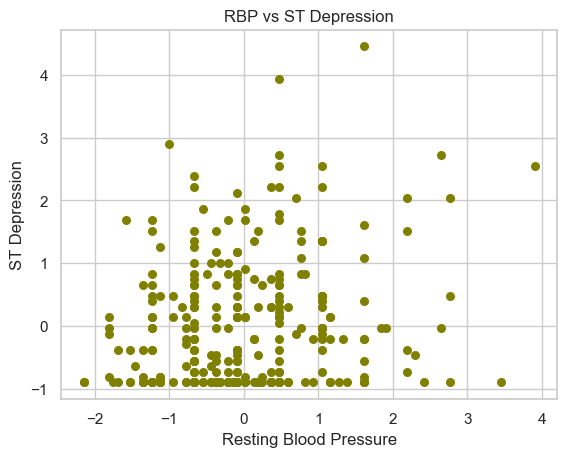

In [104]:
plt.scatter(df['trestbps'],df['oldpeak'],  c = '#808000', linewidth = 1,s=30)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('ST Depression')
plt.title('RBP vs ST Depression')
plt.show()

# Analysing numerical features w.r.t Target


Number of Patients not diagnosed with Heart Disease: 138
Number of Patients diagnosed with Heart Disease: 165


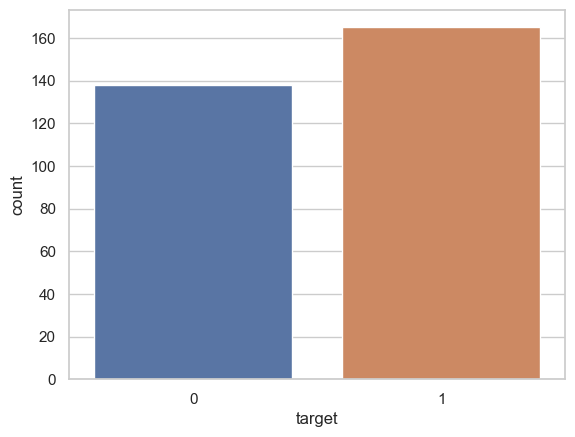

In [105]:
sns.countplot(x='target',data=df)
yes, no = Y.value_counts()
print('Number of Patients not diagnosed with Heart Disease:', no)
print('Number of Patients diagnosed with Heart Disease:', yes)


In [106]:

target_temp = df.target.value_counts()
print("Percentage of patients without heart problems: " + str(round(target_temp[0] * 100 / 303, 2)))
print("Percentage of patients with heart problems: " + str(round(target_temp[1] * 100 / 303, 2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


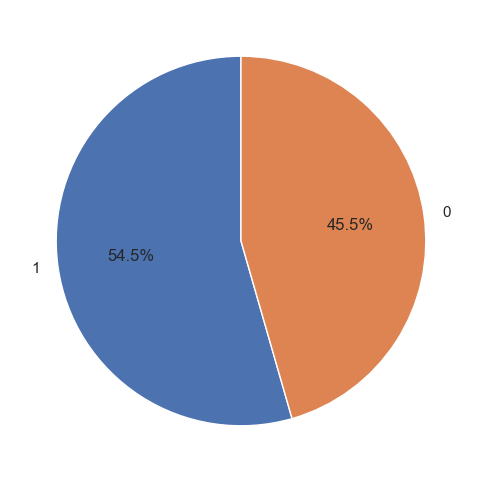

In [107]:
plt.figure(figsize=(8, 6))
heart_disease_counts = df['target'].value_counts()
plt.pie(heart_disease_counts.values, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90 )
plt.show()

# Categorial Feature

Exercise Induced Angina Yes:  99
Exercise Induced Angina No: 204


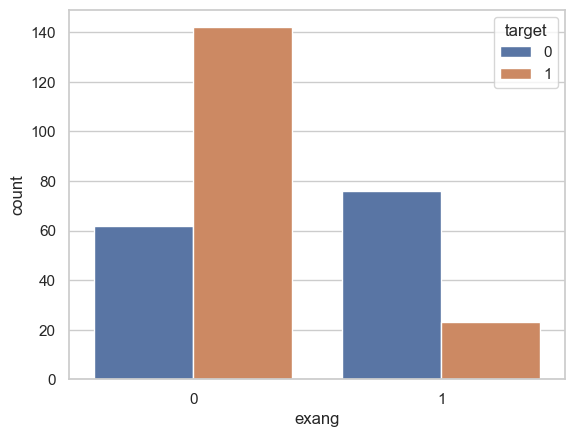

In [108]:
sns.countplot(x="exang", data=df,hue='target')
no, yes = df['exang'].value_counts()
print('Exercise Induced Angina Yes: ', yes)
print('Exercise Induced Angina No:', no)

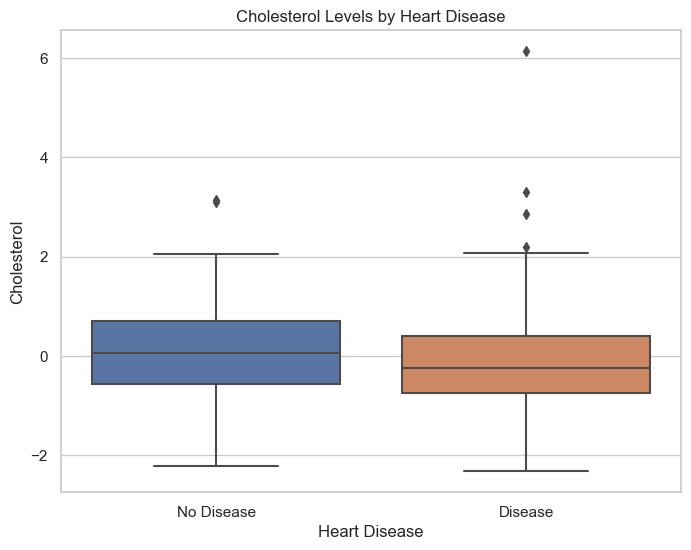

In [109]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

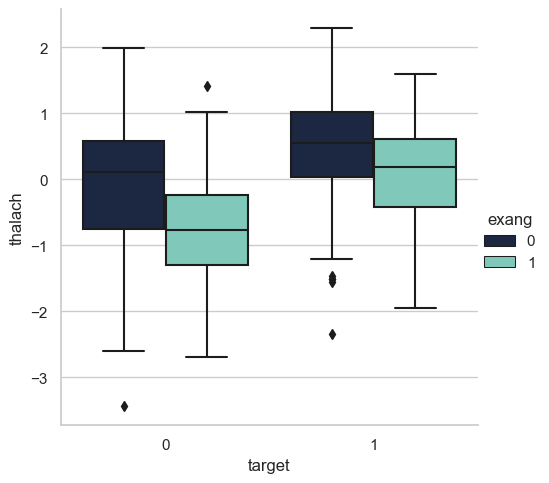

In [110]:
sns.catplot(x = 'target',y='thalach',data=df,kind='box',hue='exang', palette=sns.color_palette(['#162447', '#74d4c0']))

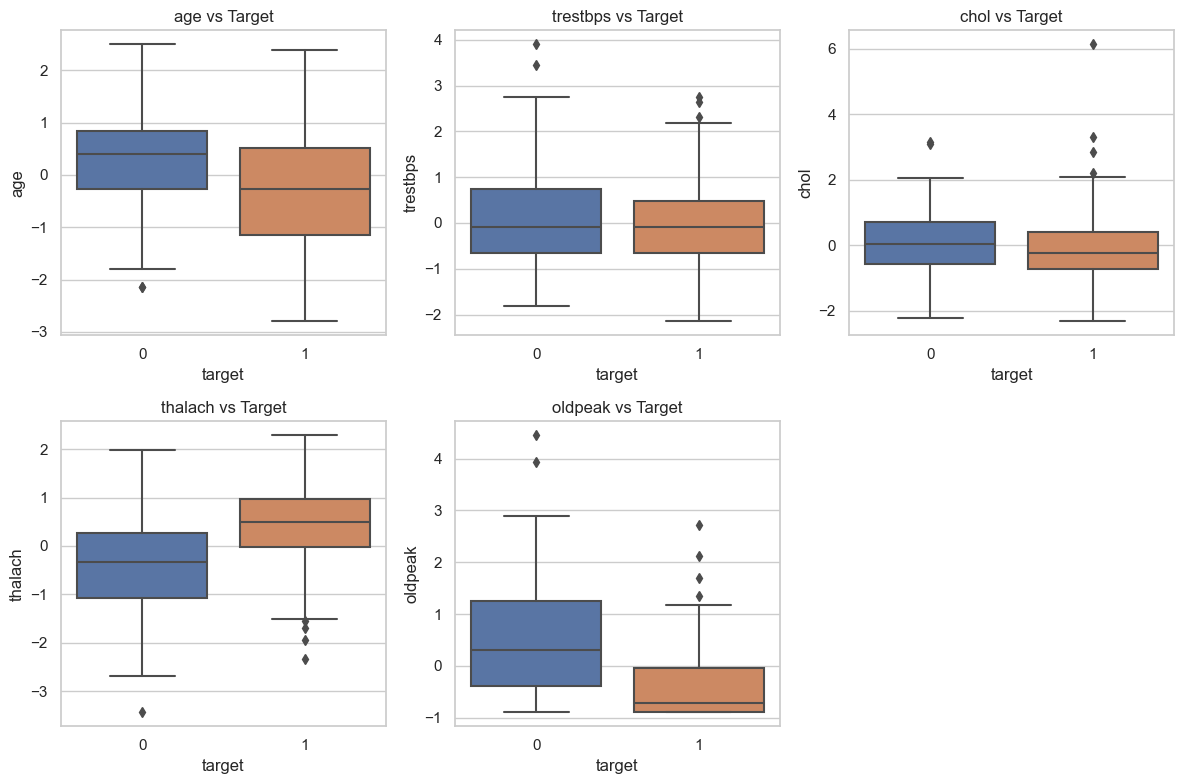

In [111]:
# relationships between features and the target variable
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()


# Correlation 

<Axes: >

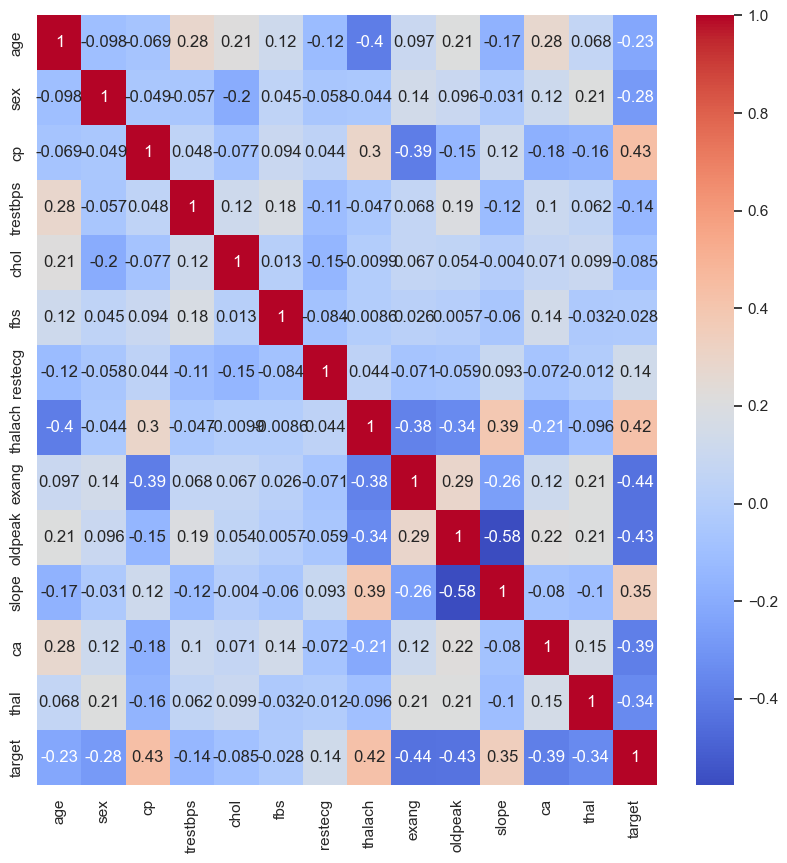

In [112]:
plt.figure( figsize = (10,10))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')

# Splitting the Features and Target



In [113]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [114]:
print(X)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.952197    1   3  0.763956 -0.256334    1        0  0.015443      0   
1   -1.915313    1   2 -0.092738  0.072199    0        1  1.633471      0   
2   -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514      0   
3    0.180175    1   1 -0.663867 -0.198357    0        1  1.239897      0   
4    0.290464    0   0 -0.663867  2.082050    0        1  0.583939      1   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
298  0.290464    0   0  0.478391 -0.101730    0        1 -1.165281      1   
299 -1.033002    1   3 -1.234996  0.342756    0        1 -0.771706      0   
300  1.503641    1   0  0.706843 -1.029353    1        1 -0.378132      0   
301  0.290464    1   0 -0.092738 -2.227533    0        1 -1.515125      1   
302  0.290464    0   1 -0.092738 -0.198357    0        0  1.064975      0   

      oldpeak  slope  ca  thal  
0    1.087338      0   0     1  
1    2.12

In [115]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Splitting the Data into Training data & Test Data



In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [117]:
print(X.shape, X_train.shape, X_test.shape)


(303, 13) (242, 13) (61, 13)


In [118]:
print(len(X_train), len(X_test) )
print(len(Y_train), len(Y_test) )


242 61
242 61


# Models

1. Logistic Regression
2. KNN classifier

# Logistic Regression

In [119]:
# Train the Logistic Regression model with default parameters
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [120]:
# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

In [121]:
# Evaluate the model
accuracy_log_reg = accuracy_score(Y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(Y_test, y_pred_log_reg)
class_report_log_reg = classification_report(Y_test, y_pred_log_reg)
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_log_reg)
print("\nClassification Report:\n", class_report_log_reg)

Logistic Regression Classifier:
Accuracy: 0.85

Confusion Matrix:
 [[25  4]
 [ 5 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [122]:
# Evaluate on the training data to check for overfitting
X_train_prediction_log_reg = log_reg.predict(X_train)
training_data_accuracy_log_reg = accuracy_score(Y_train, X_train_prediction_log_reg)
print('Accuracy on Training data: ', round(training_data_accuracy_log_reg, 3))


Accuracy on Training data:  0.864


In [123]:
# Evaluate on the testing data to check the generalization
test_accuracy_log_reg = accuracy_score(Y_test, log_reg.predict(X_test))
print('Test Accuracy: ', round(test_accuracy_log_reg, 3))

Test Accuracy:  0.852


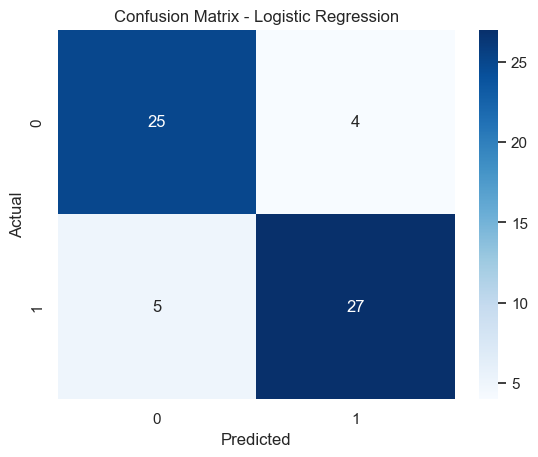

In [124]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Without package

In [125]:
# Features and target variable
X = df.drop(columns=['target']).values
y = df['target'].values

In [126]:
# Normalize the features manually
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

In [127]:
# Split the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, weights):
    return sigmoid(np.dot(X, weights))

def predict(X, weights, threshold=0.5):
    return (predict_proba(X, weights) >= threshold).astype(int)

def logistic_regression(X, y, lr=0.01, num_iter=10000):
    weights = np.zeros(X.shape[1])
    for _ in range(num_iter):
        linear_model = np.dot(X, weights)
        y_pred = sigmoid(linear_model)
        gradient = np.dot(X.T, (y_pred - y)) / y.size
        weights -= lr * gradient
    return weights



In [128]:
# Train the Logistic Regression model
weights = logistic_regression(X_train, y_train, lr=0.01, num_iter=10000)

In [129]:
# Predict on the training data
y_train_pred_log_reg = predict(X_train, weights)

In [130]:
# Predict on the test data
y_test_pred_log_reg = predict(X_test, weights)

In [131]:
# Evaluate the model

accuracy_train_log_reg = np.mean(y_train_pred_log_reg == y_train)
accuracy_test_log_reg = np.mean(y_test_pred_log_reg == y_test)
print(f"Logistic Regression Classifier Training Accuracy: {accuracy_train_log_reg:.2f}")
print(f"Logistic Regression Classifier Testing Accuracy: {accuracy_test_log_reg:.2f}")


Logistic Regression Classifier Training Accuracy: 0.86
Logistic Regression Classifier Testing Accuracy: 0.85


In [132]:
def confusion_matrix(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    result = np.zeros((K, K), dtype=int)
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)

Confusion Matrix:
 [[24  4]
 [ 5 27]]


In [133]:
def classification_report(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    report = ""
    conf_matrix = confusion_matrix(y_true, y_pred)
    for i in range(K):
        tp = conf_matrix[i, i]
        fp = conf_matrix[:, i].sum() - tp
        fn = conf_matrix[i, :].sum() - tp
        tn = conf_matrix.sum() - (tp + fp + fn)
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report += f"Class {i}:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}\n"
    return report

print("Classification Report:\n", classification_report(y_test, y_test_pred_log_reg))


Classification Report:
 Class 0:
Precision: 0.83, Recall: 0.86, F1-score: 0.84
Class 1:
Precision: 0.87, Recall: 0.84, F1-score: 0.86



# Building a predictive model (logistic Regression)

In [134]:
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log_reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


# Saving train model (Logistic Regression )

In [135]:
import pickle

In [136]:
filename = 'log_reg_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [137]:
# loading the saved model
loaded_model_log = pickle.load(open('heart_disease_model.sav', 'rb'))

# KNN Classifier
with package


In [138]:
# Train the KNN model with a manually specified number of neighbors
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [139]:
# Predict on the test data
y_pred_knn = knn.predict(X_test)


In [140]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)



K-Nearest Neighbors Classifier:
Accuracy: 0.87

Confusion Matrix:
 [[26  2]
 [ 6 26]]

Classification Report:
 Class 0:
Precision: 0.81, Recall: 0.93, F1-score: 0.87
Class 1:
Precision: 0.93, Recall: 0.81, F1-score: 0.87



In [141]:
# Evaluate on the training data to check for overfitting
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(y_train, X_train_prediction_knn)
print('Accuracy on Training data: ', round(training_data_accuracy_knn, 3))

Accuracy on Training data:  0.889


In [142]:
# Evaluate on the testing data to check the generalization
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
print('Test Accuracy: ', round(test_accuracy_knn, 3))

Test Accuracy:  0.867


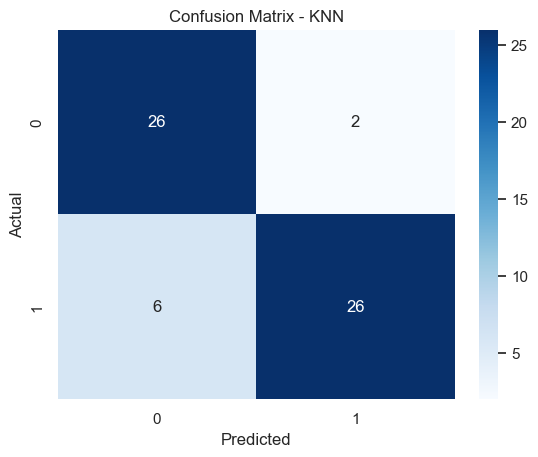

In [143]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



without package

In [144]:
# Features and target variable
X = df.drop(columns=['target']).values
y = df['target'].values

In [145]:
# Normalize the features manually
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

In [146]:
# Split the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(most_common)
    return np.array(y_pred)


In [147]:
# Predict on the training data
y_train_pred_knn = knn_predict(X_train, y_train, X_train, k=3)


In [148]:
# Predict on the test data
y_test_pred_knn = knn_predict(X_train, y_train, X_test, k=3)

In [149]:
# Evaluate the model
accuracy_train_knn = np.mean(y_train_pred_knn == y_train)
accuracy_test_knn = np.mean(y_test_pred_knn == y_test)
print(f"K-Nearest Neighbors Classifier Training Accuracy: {accuracy_train_knn:.2f}")
print(f"K-Nearest Neighbors Classifier Testing Accuracy: {accuracy_test_knn:.2f}")

K-Nearest Neighbors Classifier Training Accuracy: 0.89
K-Nearest Neighbors Classifier Testing Accuracy: 0.87


In [150]:
def confusion_matrix(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    result = np.zeros((K, K), dtype=int)
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

Confusion Matrix:
 [[26  2]
 [ 6 26]]


In [151]:
def classification_report(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    report = ""
    for i in range(K):
        tp = conf_matrix_knn[i, i]
        fp = conf_matrix_knn[:, i].sum() - tp
        fn = conf_matrix_knn[i, :].sum() - tp
        tn = conf_matrix_knn.sum() - (tp + fp + fn)
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report += f"Class {i}:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}\n"
    return report

print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
 Class 0:
Precision: 0.81, Recall: 0.93, F1-score: 0.87
Class 1:
Precision: 0.93, Recall: 0.81, F1-score: 0.87



# Building a Predictive System (KNN Classifier)



In [152]:
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


# Saving the trained model  (KNN Classifier)



In [153]:
import pickle


In [154]:
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [155]:
# loading the saved model
loaded_model_knn = pickle.load(open('knn_model.sav', 'rb'))